In [1]:
using Plots
pyplot()

  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/abcsds/.julia/v0.6/IJulia/src/kernel.jl:31


Plots.PyPlotBackend()

## Input
Values to input to this function:

- `file`: file containing the signals in tsv format, with header.
- `n_channels`: number of useful channels in eeg file.
- `sampFreq`: Single sample frequency for all eeg channels.

In [2]:
n_channels = 19
file = "eeg.txt"
sampFreq = 500

500

In [3]:
signals = readdlm(joinpath(pwd(),"..","exapmle",file),'\t',header=true)
sig = convert.(Float64,signals[1][:,1:n_channels]);
header = signals[2][:,1:n_channels]
header = [i[1:end-5] for i in header]

1×19 Array{SubString{String},2}:
 "Fp1"  "Fp2"  "Fz"  "F3"  "F4"  "F7"  …  "P3"  "P4"  "T5"  "T6"  "O1"  "O2"

In [4]:
typeof(sig)

Array{Float64,2}

In [5]:
n = size(sig)[1]
p = fft(sig,1)
n_unique = ceil(Int, (n+1)/2)
p = p[1:n_unique,:]
p = abs.(p)
p = p ./ n #scale
p = p.^2  # square it
# odd nfft excludes Nyquist point
if n % 2 > 0
    p[2:length(p)] = p[2:length(p)]*2 # we've got odd number of   points fft
else 
    p[2:(length(p)-1)] = p[2: (length(p) -1)]*2 # we've got even number of points fft
end
freqArray = (0:(n_unique-1)) * (sampFreq / n)

0.0:0.0033003300330033004:250.0


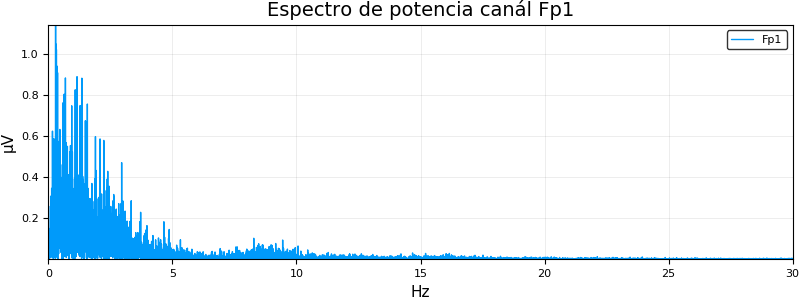

In [6]:
channel = 1
lab = header[channel]
plot(freqArray,p[:,channel],
    xlims=(0, 30), 
    label=lab, 
    size=(800,300),
    xlabel="Hz",
    ylabel="µV",
    title="Espectro de potencia canál $lab")


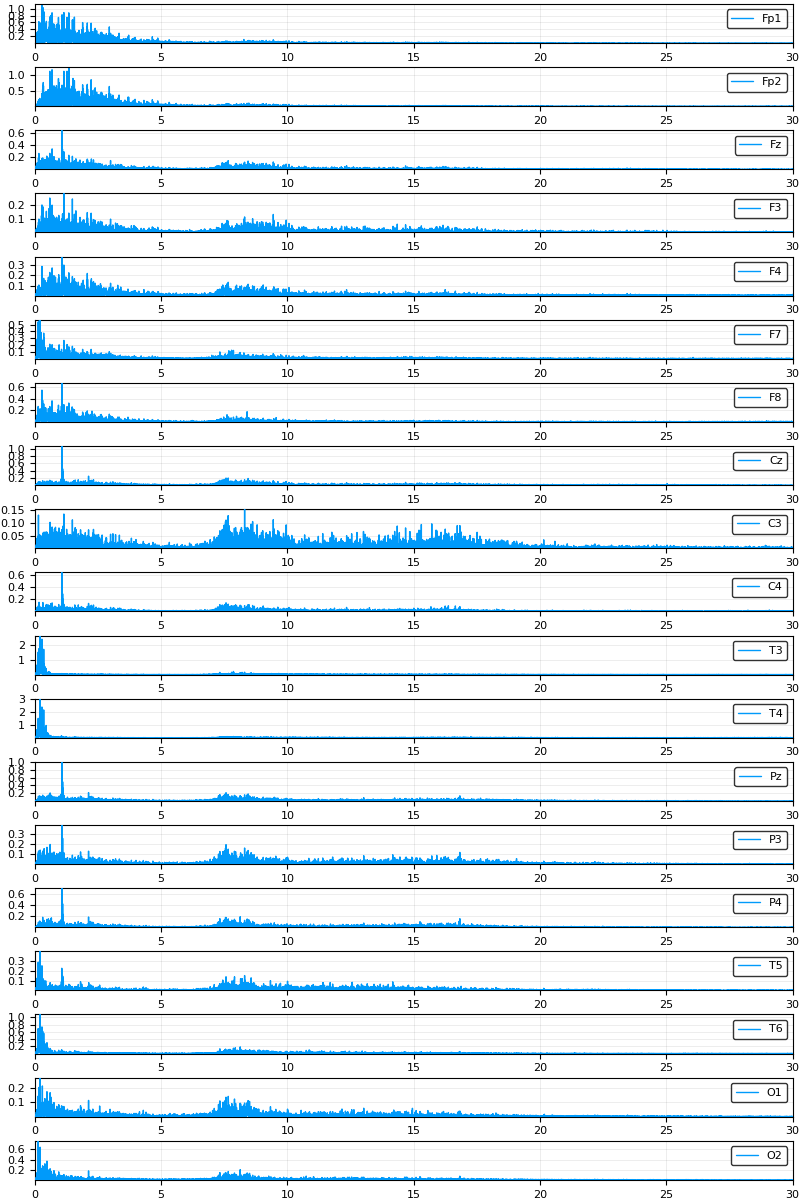

In [7]:
freqz = repmat(freqArray,1,size(p,2))
plot(freqz,p, layout=(n_channels,1), 
    size=(800,1200), 
    label=header,
    xlims=(0,30))
#     xlabel="Hz",
#     ylabel="uV",
#     title="Espectro de potencia")

In [8]:
function cut_frequencies(p::Array{Float64,2}, freqArray, lowFreq, highfreq)
    m = sum(lowFreq .<= freqArray .< highfreq)
    filter_freq = repmat(freqArray,1,size(p,2))
    res = p[lowFreq.<= filter_freq .< highfreq]
    res = reshape(res, m,size(p,2))
end

cut_frequencies (generic function with 1 method)

In [9]:
abs_delta  = sum(cut_frequencies(p,freqArray,1,4),1)
abs_theta  = sum(cut_frequencies(p,freqArray,4,8),1)
abs_alpha1 = sum(cut_frequencies(p,freqArray,8,11),1)
abs_alpha2 = sum(cut_frequencies(p,freqArray,11,14),1)
abs_beta1  = sum(cut_frequencies(p,freqArray,14,20),1)
abs_beta2  = sum(cut_frequencies(p,freqArray,20,31),1)
abs_gamma  = sum(cut_frequencies(p,freqArray,31,50),1)
total      = sum(cut_frequencies(p,freqArray,1,50),1)

rel_delta  = abs_delta  ./total
rel_theta  = abs_theta  ./total
rel_alpha1 = abs_alpha1 ./total
rel_alpha2 = abs_alpha2 ./total
rel_beta1  = abs_beta1  ./total
rel_beta2  = abs_beta2  ./total
rel_gamma  = abs_gamma  ./total


1×19 Array{Float64,2}:
 0.0254595  0.0233637  0.0459355  …  0.0634119  0.0454584  0.044681

## Output
values for this function to return:
```
abs = [abs_delta, abs_theta, abs_alpha1, abs_alpha2, abs_beta1, abs_beta2, abs_gamma, total]
rel = [rel_delta, rel_theta, rel_alpha1, rel_alpha2, rel_beta1, rel_beta2, rel_gamma]

```

In [18]:
vec = [abs_delta; abs_theta; abs_alpha1; abs_alpha2; abs_beta1; abs_beta2; abs_gamma]
println(size(vec))
println(typeof(vec))
vec

(7, 19)
Array{Float64,2}


7×19 Array{Float64,2}:
 88.951    119.962    27.2338   20.5954   …   7.51482  10.489    12.1635 
 17.936     23.3286   13.1192    9.07189      9.9496   12.4559   13.3756 
 11.4258    11.5501   17.0514   14.6375      18.2043   11.8445   15.0527 
  4.53563    4.42959   6.53773   6.83102      9.87236   7.58205   9.27719
  6.40824    5.82881  10.5275   11.5785       9.57923   9.73217  10.8543 
  4.73408    5.13429   6.73884   7.67097  …   3.49268   4.00923   4.01347
  3.50046    4.07243   3.90996   6.35978      3.9684    2.67228   3.02779

In [19]:
typeof(freqArray)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [20]:
?sum

search: sum sum! sumabs summary sumabs2 sum_kbn cumsum cumsum! consume



```
sum(f, itr)
```

Sum the results of calling function `f` on each element of `itr`.

```jldoctest
julia> sum(abs2, [2; 3; 4])
29
```

```
sum(itr)
```

Returns the sum of all elements in a collection.

```jldoctest
julia> sum(1:20)
210
```

```
sum(A, dims)
```

Sum elements of an array over the given dimensions.

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> sum(A, 1)
1×2 Array{Int64,2}:
 4  6

julia> sum(A, 2)
2×1 Array{Int64,2}:
 3
 7
```


In [22]:
typeof('\t')

Char

In [40]:
size(sum(vec[:],1))

(1,)

In [53]:
absl  = [abs_delta; abs_theta; abs_alpha1; abs_alpha2; abs_beta1; abs_beta2; abs_gamma]
println(size(absl))
println(size(absl[1,:]))
total = sum(absl,1)

(7, 19)
(19,)


1×19 Array{Float64,2}:
 137.491  174.306  85.1184  76.745  …  68.2817  62.5814  58.7851  67.7646

In [57]:
delta  = (absl[1,:]' ./ total)

1×19 Array{Float64,2}:
 0.646958  0.688228  0.319952  0.268361  …  0.120081  0.178429  0.179496

In [43]:
typeof(abs_delta[:])

Array{Float64,1}

In [55]:
size(delta)


(1, 19)